In [1]:
import numpy as np
import scipy.special as scisp
import scipy.integrate as integ
import mpmath
from scipy import constants as const
import Green_functions as gr
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
sim = gr.simulation()
import scipy as sc
import nanonis
from scipy.signal import savgol_filter
import deconvolution
import matplotlib.ticker as ticker
%matplotlib qt

sim.GYSRLSCalcSquare( J1=-0.0296,J2=0,alpha=0,delta=0.0000287,m=20.956,pf=0.274,dynes=5e-6,Epx=400,x=(0,157),xypx=100,YSRenergy=0.000020947026906146,dir='110')




1 cycle: 0.0 minutes --- Total time: 0.12 seconds


In [48]:
file="C:/Users/jonor/Desktop/PhD/Lanak/YSR states on proximitized metals/S201109_022.dat"

spec=nanonis.biasSpectroscopy()
spec.load(file)
plt.plot(spec.bias,savgol_filter(spec.conductance,7,3))


In [7]:
x=np.linspace(-3,3,100)
y=[]

for i in x:
    sim.G(1,1,i+0.01j,1,1,1,0)
    y.append(-np.trace(np.imag(sim.G0)))
plt.plot(x,y)

C:\Users\jonor\AppData\Local\Temp/ipykernel_10404/4274449038.py:12: DeprecationWarning: `np.complex` is a deprecated alias for the builtin `complex`. To silence this warning, use `complex` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.complex128` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y.append(F(np.complex(i,0.01),1,0.5,0.5))


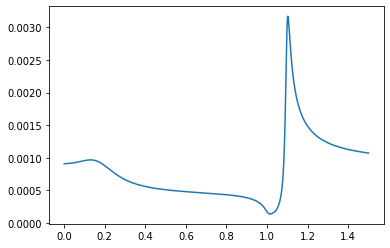

In [41]:
def F(E,delta,alpha,eta):
    O=np.sqrt(E**2-delta**2)
    a=4*np.divide(E-O,E+O)*E**2
    u=1+np.divide(E-O,E+O)*eta+alpha*np.divide(2*O,E+O)*(1-eta)
    D=np.divide(a,u**2)
    return np.divide(2,np.pi*700)*np.real(np.divide(E,np.sqrt(E**2-D**2)))
    

x=np.linspace(0,1.5,1000)
y=[]
for i in x:
    y.append(F(np.complex(i,0.01),1,0.5,0.5))

plt.plot(x,y)

plt.show()



In [3]:
def F(E,delta,d,eta):
    E=E+1j*eta
    OS=np.sqrt(E**2-delta**2)
    a=d
    g=complex(0,1)*np.divide(E,OS)
    return np.abs(np.imag(np.divide(g*np.cos(a*np.abs(E))+np.sin(a*np.abs(E)),g*np.sin(a*np.abs(E))-np.cos(a*np.abs(E)))))

def fermi(E,T):
    kb=8.62E-2
    return np.divide(1,1+np.exp(np.divide(E,kb*T)))

def dynes(E,eta,delta):
    E=E+1j*eta
    return np.imag(E/np.sqrt(-E**2+delta**2))

def conv(V,delta,d,eta,T):
    E=np.linspace(-2*V,2*V,5000)
    return -np.trapz(dynes(E,eta,delta)*F(E+V,delta,d,2*eta)*(fermi(E+V,T)-fermi(E,T)),x=E)

x=np.linspace(-5,5,500)
y=[]
for i in x:
    y.append(conv(i,0.78,2,0.05,1))

plt.plot(x,np.abs(np.gradient(y)))
plt.show()

In [75]:
x=np.linspace(-5,5,500)

plt.plot(x,F(x,0.78,3,0.1))
plt.plot(x,dynes(x,0.1,0.78))
plt.show()


In [106]:
def Ff(E,x,delta,d,eta):
    E=E+1j*eta
    OS=np.sqrt(E**2-delta**2)
    kp=1000*np.sqrt(1+d*np.abs(E)/1000)
    km=1000*np.sqrt(1-d*np.abs(E)/1000)
    F=E/OS
    A=1j*F*np.cos(kp*x+km*d)-np.sin(kp*x+km*d)
    return np.abs(np.imag(np.divide(A,1j*F*np.sin(d*np.abs(E))-np.cos(d*np.abs(E)))))

x=np.linspace(-1,1,500)

plt.plot(x,Ff(x,-3,0.1,3,0.00001))
plt.show()


In [4]:
def H1(J1,J2,J12,Delta,t):
  a= np.kron(np.identity(8), [[J12/4, 0, 0, 0], [0, -J12/4, J12/2, 0], [0, J12/2, -J12/4,0], [0, 0, 0, J12/4]])
  b=np.kron(np.diag([1, 0]),np.kron( [[2*Delta, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, -2*Delta]], np.identity(4)) )
  c=np.kron(np.diag([0, 1]),np.kron(np.diag([1, 1, -1, -1]),np.diag([J1/4, J1/4, -J1/4, -J1/4])))
  d=np.kron(np.diag([0, 1]),np.kron( [[0, 0, 1, 0], [0, 0, 0, 1], [0, 0, 0, 0], [0, 0, 0, 0]], [[0, 0, 0, 0], [0, 0, 0, 0], [J1/2, 0, 0, 0], [0, J1/2, 0, 0]]) )
  e=np.kron(np.diag([0, 1]), np.kron([[0, 0, 0, 0], [0, 0, 0, 0], [1, 0, 0, 0], [0, 1, 0, 0]], [[0, 0, J1/2, 0], [0, 0, 0, J1/2], [0, 0, 0, 0], [0, 0, 0, 0]]))
  f=np.kron(np.diag([0, 1]),np.kron(np.diag([1, -1, 1, -1]), np.diag([J2/4, -J2/4, J2/4, -J2/4])) )
  g=np.kron(np.diag([0, 1]), np.kron([[0, 1, 0, 0], [0, 0, 0, 0], [0, 0, 0, 1], [0, 0, 0, 0]], [[0, 0, 0, 0], [J2/2, 0, 0, 0], [0, 0, 0,0], [0, 0, J2/2, 0]]) )
  h=np.kron(np.diag([0, 1]), np.kron([[0, 0, 0, 0], [1, 0, 0, 0], [0, 0, 0, 0], [0, 0, 1, 0]], [[0, J2/2, 0, 0], [0, 0, 0, 0], [0, 0, 0, J2/2], [0, 0, 0, 0]]) )
  i=np.kron([[0, 1], [1, 0]],np.kron([[0, t, 0, 0], [0, 0, -t, 0], [0, 0, t, 0], [0, -t, 0, 0]], np.identity(4)))

  return a+b+c+d+e+f+g+h+i

def H2(J1,J2,J12,Delta,t):
  a=np.kron(np.identity(8), [[J12/4, 0, 0, 0], [0, -J12/4, J12/2, 0], [0, J12/2, -J12/4, 0], [0, 0, 0, J12/4]]) 
  b=np.kron(np.identity(2),np.kron( np.diag([-Delta, Delta]), np.identity(8)) )
  c=np.kron(np.diag([1, 1, 0, 0]),np.kron( np.diag([1, -1]),  np.diag([J2/4, -J2/4, J2/4, -J2/4]))) 
  d=np.kron(np.diag([1, 1, 0, 0]), np.kron([[0, 0], [1, 0]], [[0, J2/2, 0, 0], [0, 0, 0, 0], [0, 0, 0, J2/2], [0, 0, 0, 0]]) )
  e=np.kron(np.diag([1, 1, 0, 0]),np.kron( [[0, 1], [0, 0]], [[0, 0, 0, 0], [J2/2, 0, 0, 0], [0, 0, 0, 0], [0, 0, J2/2, 0]]) )
  f=np.kron(np.diag([0, 0, 1, 1]),np.kron( np.diag([1, -1]), np.diag([J1/4, -J1/4, J1/4, -J1/4])) )
  g=np.kron(np.diag([0, 0, 1, 1]),np.kron( [[0, 0], [1, 0]], [[0, J1/2, 0, 0], [0, 0, 0, 0], [0, 0, 0, J1/2], [0, 0, 0, 0]]) )
  h=np.kron(np.diag([0, 0, 1, 1]),np.kron( [[0, 1], [0, 0]], [[0, 0, 0, 0], [J1/2, 0, 0, 0], [0, 0, 0, 0], [0, 0, J1/2, 0]]) )
  i=np.kron([[0, 0, 1, 0], [0, 0, 0, 1], [1, 0, 0, 0], [0, 1, 0,0]], np.kron(np.diag([t, -t]), np.identity(4)))
  
  return a+b+c+d+e+f+g+h+i



def eigh1(J1,J2,J12,Delta,t):
  return np.linalg.eigh(H1(J1,J2,J12,Delta,t))

def eigh2(J1,J2,J12,Delta,t):
  return np.linalg.eigh(H2(J1,J2,J12,Delta,t))

In [6]:
x=np.linspace(0,1,100)
J1_1=[]
J2_1=[]
J12_1=[]
t_1=[]
J1_2=[]
J2_2=[]
J12_2=[]
t_2=[]


cm = 1/2.54
f = plt.figure(figsize=(21*cm,15*cm))

for i in x:
    J1_1.append(eigh1(i,0,0,1,0)[0])
    J1_2.append(eigh2(i,0,0,1,0)[0])
for i in x:
    J2_1.append(eigh1(1,i,0,1,0)[0])
    J2_2.append(eigh2(1,i,0,1,0)[0])
for i in x:
    J12_1.append(eigh1(1,1,i,1,0)[0])
    J12_2.append(eigh2(1,1,i,1,0)[0])
for i in x:
    t_1.append(eigh1(1,1,1,1,i)[0])
    t_2.append(eigh2(1,1,1,1,i)[0])
J1_1=np.array(J1_1)
J2_1=np.array(J2_1)
J12_1=np.array(J12_1)
t_1=np.array(t_1)
J1_2=np.array(J1_2)
J2_2=np.array(J2_2)
J12_2=np.array(J12_2)
t_2=np.array(t_2)


ax = []

gs1 = GridSpec(1, 4,width_ratios=[1,1,1,1],wspace=0)
ax.append(f.add_subplot(gs1[0,0]))
ax.append(f.add_subplot(gs1[0,1]))
ax.append(f.add_subplot(gs1[0,2]))
ax.append(f.add_subplot(gs1[0,3]))
ax[1].yaxis.set_visible(False)
ax[2].yaxis.set_visible(False)
ax[3].yaxis.set_visible(False)

ax[1].xaxis.set_ticks_position('top')
ax[3].xaxis.set_ticks_position('top')
ax[0].set_xlabel('J1')
ax[1].set_xlabel('J2')
ax[2].set_xlabel('J12')
ax[3].set_xlabel('t')
ax[0].set_ylim(-3,3)
ax[1].set_ylim(-3,3)
ax[2].set_ylim(-3,3)
ax[3].set_ylim(-3,3)

for i in range(0,32):
    ax[0].plot(x,J1_1[:,i],color='C0')
    ax[0].plot(x,J1_2[:,i],color='C1')
    ax[1].plot(x,J2_1[:,i],color='C0')
    ax[1].plot(x,J2_2[:,i],color='C1')
    ax[2].plot(x,J12_1[:,i],color='C0')
    ax[2].plot(x,J12_2[:,i],color='C1')
    ax[3].plot(x,t_1[:,i],color='C0')
    ax[3].plot(x,t_2[:,i],color='C1')
plt.show()

In [60]:
np.concatenate((x,x),axis=None)


array([0.        , 0.01010101, 0.02020202, 0.03030303, 0.04040404,
       0.05050505, 0.06060606, 0.07070707, 0.08080808, 0.09090909,
       0.1010101 , 0.11111111, 0.12121212, 0.13131313, 0.14141414,
       0.15151515, 0.16161616, 0.17171717, 0.18181818, 0.19191919,
       0.2020202 , 0.21212121, 0.22222222, 0.23232323, 0.24242424,
       0.25252525, 0.26262626, 0.27272727, 0.28282828, 0.29292929,
       0.3030303 , 0.31313131, 0.32323232, 0.33333333, 0.34343434,
       0.35353535, 0.36363636, 0.37373737, 0.38383838, 0.39393939,
       0.4040404 , 0.41414141, 0.42424242, 0.43434343, 0.44444444,
       0.45454545, 0.46464646, 0.47474747, 0.48484848, 0.49494949,
       0.50505051, 0.51515152, 0.52525253, 0.53535354, 0.54545455,
       0.55555556, 0.56565657, 0.57575758, 0.58585859, 0.5959596 ,
       0.60606061, 0.61616162, 0.62626263, 0.63636364, 0.64646465,
       0.65656566, 0.66666667, 0.67676768, 0.68686869, 0.6969697 ,
       0.70707071, 0.71717172, 0.72727273, 0.73737374, 0.74747

In [3]:
def M(Del,D,J1,J2):
    Delta= [[Del, 0, 0, 0, 0, 0], [0, Del, 0, 0, 0, 0], [0, 0, Del, 0, 0, 0], [0, 0, 0, Del, 0, 0], [0, 0, 0, 0, Del, 0], [0, 0, 0, 0, 0, Del]]
    Spin= [[(25/4)*D, 0, 0, 0, 0, 0], [0, (9/4)*D, 0, 0, 0, 0], [0, 0, (1/4)*D, 0, 0, 0], [0, 0, 0, (1/4)*D, 0, 0], [0, 0, 0, 0, (9/4)*D, 0], [0, 0, 0, 0, 0, (25/4)*D]]
    DJ1= [[(5/4)*J1, 0, 0, 0, 0, 0], [0, (3/4)*J1, 0, 0, 0, 0], [0, 0, (1/4)*J1, 0, 0, 0], [0, 0, 0, -(1/4)*J1, 0, 0], [0, 0, 0, 0, -(3/4)*J1, 0], [0, 0, 0, 0, 0, -(5/4)*J1]]
    ND1J1= [[0, 0, 0, 0, 0, 0], [(np.sqrt(5)/2)*J1, 0, 0, 0, 0, 0], [0, np.sqrt(2)*J1, 0, 0, 0, 0], [0, 0, (3/2)*J1, 0, 0, 0], [0, 0, 0, np.sqrt(2)*J1, 0, 0], [0, 0, 0, 0, (np.sqrt(5)/2)*J1, 0]]
    ND2J1= [[0, (np.sqrt(5)/2)*J1, 0, 0, 0, 0], [0, 0, np.sqrt(2)*J1, 0, 0, 0], [0, 0, 0, (3/2)*J1, 0, 0], [0, 0, 0, 0, np.sqrt(2)*J1, 0], [0, 0, 0, 0, 0, (np.sqrt(5)/2)*J1], [0, 0, 0, 0, 0, 0]]
    DJ2= [[(5/4)*J2, 0, 0, 0, 0, 0], [0, (3/4)*J2, 0, 0, 0, 0], [0, 0, (1/4)*J2, 0, 0, 0], [0, 0, 0, -(1/4)*J2, 0, 0], [0, 0, 0, 0, -(3/4)*J2, 0], [0, 0, 0, 0, 0, -(5/4)*J2]]
    ND1J2= [[0, 0, 0, 0, 0, 0], [(np.sqrt(5)/2)*J2, 0, 0, 0, 0, 0], [0, np.sqrt(2)*J2, 0, 0, 0, 0], [0, 0, (3/2)*J2, 0, 0, 0], [0, 0, 0, np.sqrt(2)*J2, 0, 0], [0, 0, 0, 0, (np.sqrt(5)/2)*J2, 0]]
    ND2J2= [[0, (np.sqrt(5)/2)*J2, 0, 0, 0, 0], [0, 0, np.sqrt(2)*J2, 0, 0, 0], [0, 0, 0, (3/2)*J2, 0, 0], [0, 0, 0, 0, np.sqrt(2)*J2, 0], [0, 0, 0, 0, 0, (np.sqrt(5)/2)*J2], [0, 0, 0, 0, 0, 0]]
    tau0 = [[1,0,0,0],[0,1,0,0],[0,0,1,0],[0,0,0,1]]
    tauz = [[1, 0, 0, 0], [0, -1, 0, 0], [0, 0, 1, 0], [0, 0, 0, -1]]
    tauzz = [[1, 0, 0, 0], [0, 1, 0, 0], [0, 0, -1, 0], [0, 0, 0, -1]]
    tau1 = [[0, 1, 1, 0], [1, 0, 0, 1], [1, 0, 0, 1], [0, 1, 1, 0]]
    tau21 = [[0, 0, 1, 0], [0, 0, 0, 1], [0, 0, 0, 0], [0, 0, 0, 0]]
    tau22 = [[0, 0, 0, 0], [0, 0, 0, 0], [1, 0, 0, 0], [0, 1, 0, 0]]
    tau31 = [[0, 1, 0, 0], [0, 0, 0, 0], [0, 0, 0, 1], [0, 0, 0, 0]]
    tau32 = [[0, 0, 0, 0], [1, 0, 0, 0], [0, 0, 0, 0], [0, 0, 1, 0]]
    Mat11= np.kron(tau0, Spin)+np.kron(tau1, Delta)
    Mat01= np.kron(tau0, Spin)+np.kron(tauz, DJ1)+np.kron(np.add(tau21,tau22), Delta)+np.kron(tau31, ND1J1)+np.kron(tau32, ND2J1)
    Mat10= np.kron(tau0, Spin)+np.kron(tauz, DJ2)+np.kron(np.add(tau21,tau22), Delta)+np.kron(tau31, ND1J2)+np.kron(tau32, ND2J2)
    Mat00= np.kron(tau0, Spin) + np.kron(tauz, DJ1) + np.kron(tauzz, DJ2) + np.kron(tau31, ND1J1) + np.kron(tau32, ND2J1) + np.kron(tau21, ND1J2) + np.kron(tau22, ND2J2)
    return [Mat11,Mat01,Mat10,Mat00]

print(M(1,1,1,1)[0])


[[6.25 0.   0.   0.   0.   0.   1.   0.   0.   0.   0.   0.   1.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   2.25 0.   0.   0.   0.   0.   1.   0.   0.   0.   0.   0.   1.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.25 0.   0.   0.   0.   0.   1.   0.   0.   0.   0.   0.
  1.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.25 0.   0.   0.   0.   0.   1.   0.   0.   0.   0.
  0.   1.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   2.25 0.   0.   0.   0.   0.   1.   0.   0.   0.
  0.   0.   1.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   6.25 0.   0.   0.   0.   0.   1.   0.   0.
  0.   0.   0.   1.   0.   0.   0.   0.   0.   0.  ]
 [1.   0.   0.   0.   0.   0.   6.25 0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   1.   0.   0.   0.   0.   0.  ]
 [0.   1.   0.   0.   0.   0.   0.   2.25 0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   1.   0.   0.   0.   0.  ]
 [0.   0.   1.  

In [56]:

import numpy as np
from scipy.optimize import fixed_point as fp
delta=0.002
kf=1
a=2000
d=10000

def k(n,E):
    ww=np.sqrt(E**2-delta**2)
    if n==1:
        return kf+E/(2*kf)
    if n==2:
        return kf-E/(2*kf)
    if n==3:
        return kf+ww/(2*kf)
    if n==4:
        return kf-ww/(2*kf)

def g(E):
    ww=np.sqrt(E**2-delta**2)
    return (E+ww)/delta


def u(A,B,C,x,E):
    if x<=0.0 and x>=-a:
        A*np.cos(k(1,E)*(x+a))
    else:
        B*np.cos(k(3,E)(x-d))+C*np.cos(k(4,E)(x-d))

def v(B,C,D,x,E):
    if x<=0.0 and x>=-a:
        D*np.cos(k(2,E)*(x+a))
    else:
        (B/g(1,E))*np.cos(k(3,E)(x-d))+(C/g(2,E))*np.cos(k(4,E)(x-d))


def f(v):
    w=0.003
    A=v[0]
    B=v[1]
    C=v[2]
    D=v[3]
    f1=A-A*np.cos(k(1,w)*a)+B*g(w)*np.cos(k(3,w)*d) + C*np.cos(k(4,w)*d) 
    f2=B-D*np.cos(k(2,w)*a) +B*np.cos(k(3,w)*d) +C*g(w)*np.cos(k(4,w)*d)
    f3=C+k(1,w)*A*np.sin(k(1,w)*a) + k(3,w)*B*g(w)*np.sin(k(3,w)*d) + k(4,w)*C*np.sin(k(4,w)*d) 
    f4=D-1.0+ A**2*(a/2 + np.sin(2*k(1,w)*a)/(4*k(1,w))) +D**2*(a/2 + np.sin(2*k(2,w)*a)/(4*k(2,w))) + B**2*(2*w/delta)*g(w)*(d/2 + np.sin(2*k(3,w)*d)/(4*k(3,w))) + C**2*(2*w/delta)*g(w)*(d/2 +np.sin(2*k(4,w)*d)/(4*k(4,w))) + B*C*(g(w)/w)*(k(3,w)*np.cos(d*k(4,w))*np.sin(d*k(3,w)) - k(4,w)*np.cos(d*k(3,w))*np.sin(d*k(4,w))) 

    return np.array([f1,f2,f3,f4])

fp(f,np.array(np.array([ 0,0,0,0])),xtol=0.001,maxiter=500000)




array([-0.25364087,  0.09062867,  0.46941169, -1.00199448])

In [16]:
m_e = 0.510e6/const.c**2

hbar = const.hbar/const.e

v = 1.39e6

m_e*v/hbar/1e10

a0 = 5.2917721e-11

def G(x,E,k=1,d=1,Delta=1):

    m_e = 1

    kp = np.sqrt(k**2 + 2*m_e*E)

    km = np.sqrt(k**2  -2*m_e*E)

    FE = np.abs(E)/(np.sqrt(E**2-Delta**2))

    G =(m_e/(k))*((1j* FE* np.cos(kp*x+km*d) - np.sin(kp*x+km*d) )*( np.cos(kp*(x+d) ))/((1j*FE* np.sin((kp-km)*d)-np.cos((kp-km)*d)) ))

    return np.abs(np.imag(G))

def f(x,w):
    G(-d,x,k=1.10e10*a0,d = d,Delta=0.75e-3/Ry_eV)/(w-x+0.001*1j)




# atomic units

Ry_eV = const.hbar**2/(const.e**2*m_e*a0**2)

E= np.linspace(-3e-3/Ry_eV,3e-3/Ry_eV,1000) +0.001j*1e-3

d = 7e-7/a0

x = np.linspace(0,-d,3000)

Er = np.real(E)

print(1.10e10*a0)

#plt.plot(Er,G(-d,E,k=1.10e10*a0,d = d,Delta=0.75e-3/Ry_eV))



0.582094931


# COULOMB GAP 

In [3]:
def E1(Q0,C1,V):
    return -0.5+Q0+C1*V
    
def E2(Q0,C1,V):
    return 0.5+Q0+C1*V

def N0(Q0,C1,V):
    return E2(Q0,C1,V)-np.mod(E2(Q0,C1,V),1)

def rho(Delta,V):
    eta=Delta/100
    return np.imag((V+1j*eta)/(np.sqrt(Delta**2-(V+1j*eta)**2)))

def fermi(T,x):
    return 1/(1+np.exp(x/T))

def f1(x,V,C1,C2,Q0,Delta,T):
    E=(1/2+N0(Q0,C1,V)-Q0+C2*V)/(C1+C2)+Delta
    return rho(Delta,x)*rho(Delta,x-E)*fermi(T,x)*(1-fermi(T,x-E))

def f2(x,V,C1,C2,Q0,Delta,T):
    E=(1/2-N0(Q0,C1,V)+Q0-C2*V)/(C1+C2)+Delta
    return rho(Delta,x)*rho(Delta,x-E)*fermi(T,x)*(1-fermi(T,x-E))

def Nf(x,Delta,V,T):
    return -rho(Delta,x)*rho(Delta,x-V)*(fermi(T,x)-fermi(T,x-V))

def Gamma1(C1,C2,Q0,Delta,T,V):
    x=np.linspace(-0.1,0.1,20000)
    return np.trapz(f1(x,V,C1,C2,Q0,Delta,T),x)

def Gamma2(C1,C2,Q0,Delta,T,V):
    x=np.linspace(-0.1,0.1,20000)
    return np.trapz(f2(x,V,C1,C2,Q0,Delta,T),x)

def current(C1,C2,Q0,Delta,T,V):
    return -Gamma1(C1,C2,Q0,Delta,T,V)+Gamma2(C1,C2,Q0,Delta,T,V)

def Ncurrent(Delta,T,V):
    x=np.linspace(-0.1,0.1,10000)
    return np.trapz(Nf(x,Delta,V,T),x)
    


Delta=0.001
C1=10
C2=100
Q0=0.0
T=0.001
V=np.linspace(-0.006,0.006,1000)
Y=[]
YY=[]
for i in V:
    #Y.append([temp1(i,0.01,C1,C2,Q0,Delta,T),temp2(i,-0.01,C1,C2,Q0,Delta,T)])
    Y.append(current(C1,C2,Q0,Delta,T,i))




#Z=np.gradient(Y)
plt.plot(V,np.gradient(Y),label='CG')
#plt.plot(V,YY,label='SS')
#plt.plot(V,30*Z)
plt.legend()
plt.show()


YSR ON A PROXIMITIZED METAL

In [3]:
kf=0.3
hbar=1
m=1


def KN(w,s):
    return kf+s*(m/(hbar**2*kf))*np.sqrt(w**2)

def KS(w,delta,s):
    return kf+s*1j*(m/(hbar**2*kf))*np.sqrt(delta**2-w**2)

def V(J):
    return np.array([[J,0],[0,J]])

def GN(w,a,x,y):
    if x>=y:
        temp=lambda s: (m/hbar**2)*np.array([[(w+s*np.sqrt(w**2)),0],[0,(w-s*np.sqrt(w**2))]])*(s*np.cos(KN(w,s)*x)*np.cos(KN(w,s)*(y+a)))/(np.sin(KN(w,s)*a)*KN(w,s)*np.sqrt(w**2))
        return temp(1)+temp(-1)
    else:
        temp=lambda s: (m/hbar**2)*np.array([[(w+s*np.sqrt(w**2)),0],[0,(w-s*np.sqrt(w**2))]])*(s*np.cos(KN(w,s)*y)*np.cos(KN(w,s)*(x+a)))/(np.sin(KN(w,s)*a)*KN(w,s)*np.sqrt(w**2))
        return temp(1)+temp(-1)

#def GN(w,a,x,y):
#    if x>=y:



def GS(w,delta,a,x,y):
    if x<=y:
        temp=lambda s: (m/hbar**2)*np.array([[(w+s*1j*np.sqrt(-w**2+delta**2)),delta],[delta,(w-s*1j*np.sqrt(-w**2+delta**2))]])*(-np.cos(KS(w,delta,s)*x)*np.exp(s*1j*KS(w,delta,s)*y))/(KS(w,delta,s)*np.sqrt(-w**2+delta**2))
        return temp(1)+temp(-1)
    else:
        temp=lambda s: (m/hbar**2)*np.array([[(w+s*1j*np.sqrt(-w**2+delta**2)),delta],[delta,(w-s*1j*np.sqrt(-w**2+delta**2))]])*(-np.cos(KS(w,delta,s)*y)*np.exp(s*1j*KS(w,delta,s)*x))/(KS(w,delta,s)*np.sqrt(-w**2+delta**2))
        return temp(1)+temp(-1)

#def GS(w,delta,a,x,y):
#    if x<=y:
#        temp=lambda s: (m/hbar**2)*np.array([[(w+s*np.sqrt(w**2-delta**2)),delta],[delta,(w-s*np.sqrt(w**2-delta**2))]])*(-1j*np.cos(KS(w,delta,s)*x)*np.exp(s*1j*KS(w,delta,s)*y))/(KS(w,delta,s)*np.sqrt(w**2-delta**2))
#        return temp(1)+temp(-1)
#    else:
#        temp=lambda s: (m/hbar**2)*np.array([[(w+s*np.sqrt(w**2-delta**2)),delta],[delta,(w-s*np.sqrt(w**2-delta**2))]])*(-1j*np.cos(KS(w,delta,s)*y)*np.exp(s*1j*KS(w,delta,s)*x))/(KS(w,delta,s)*np.sqrt(w**2-delta**2))
#        return temp(1)+temp(-1)


def GTN(w,delta,a,x,y):
    return GN(w,a,x,y)-np.dot(np.dot(GN(w,a,x,0),np.linalg.inv(GS(w,delta,a,0,0)+GN(w,a,0,0))),GN(w,a,0,y))

def GTS(w,delta,a,x,y):
    return GS(w,delta,a,x,y)-np.dot(np.dot(GS(w,delta,a,x,0),np.linalg.inv(GS(w,delta,a,0,0)+GN(w,a,0,0))),GS(w,delta,a,0,y))

def GTSN(w,delta,a,x,y):
    return np.dot(np.dot(GS(w,delta,a,x,0),np.linalg.inv(GS(w,delta,a,0,0)+GN(w,a,0,0))),GN(w,a,0,y))

def GTNS(w,delta,a,x,y):
    return np.dot(np.dot(GN(w,a,x,0),np.linalg.inv(GS(w,delta,a,0,0)+GN(w,a,0,0))),GS(w,delta,a,0,y))

def G(w,delta,a,x,y):
    if x>=0 and y>=0:
        return GTS(w,delta,a,x,y)
    if x<0 and y<0:
        return GTN(w,delta,a,x,y)
    if x>=0 and y<0:
        return GTSN(w,delta,a,x,y)
    else:
        return GTNS(w,delta,a,x,y)

def GYSR(w,delta,J,a,x,y):
    return G(w,delta,a,x,y)+np.dot(np.dot(np.dot(G(w,delta,a,x,-a),V(J)),np.linalg.inv(np.identity(2)-np.dot(V(J),G(w,delta,a,-a,-a)))),G(w,delta,a,-a,y))

def GYSR2(w,delta,J,a,x,y):
    return GS(w,delta,a,x,y)+np.dot(np.dot(np.dot(GS(w,delta,a,x,0),V(J)),np.linalg.inv(np.identity(2)-np.dot(V(J),GS(w,delta,a,0,0)))),GS(w,delta,a,0,y))

def SJdG(w,delta,a):
    return w*np.sin(a*2*m*w/(hbar**2*kf))-(np.sqrt(delta**2-w**2))*np.cos(a*2*m*w/(hbar**2*kf))

def YSR(w,delta,J,a):
    return (np.identity(2)-np.dot(V(J),G(w,delta,a,-a,-a)))[0,0]


In [4]:
x=np.linspace(-0.0015,0.0015,1000)
def bcs(x):
    return np.imag(x/np.sqrt(0.001**2-x**2))

yy=[]
a=np.linspace(10,400,30)
for j in a:
    y=[]
    for i in x:
        y.append(-np.imag(np.trace(G(i+0.00001*1j,0.001,j,-j,-j))))
    
    ax = plt.axes()
    ax.yaxis.set_major_locator(ticker.NullLocator())
    ax.xaxis.set_major_locator(ticker.NullLocator())
    ax.plot(x,y)
    plt.savefig(str(j)+'.png')
    plt.close()
    




In [8]:
x=np.linspace(-0.0015,0.0015,1000)
def bcs(x):
    return np.imag(x/np.sqrt(0.001**2-x**2))

yy=[]
a=np.linspace(80,400,5)
h=0
for j in a:
    y=[]
    for i in x:
        y.append(-np.imag(np.trace(G(i+0.00001*1j,0.001,j,-j,-j))))
    y=np.array(y)
    plt.plot(x,y/y[0]+5*h)
    h+=1

In [13]:
from detect_peaks import detect_peaks
w=np.linspace(0.000,0.0009,1000)
a=np.linspace(100,400,5)
y=[]
yy=[]
for j in a:
    y=[]
    for i in w:
        y.append(-np.imag(np.trace(G(i+0.000001*1j,0.001,j,-j,-j))))
    print(w[detect_peaks(y)[0]]/0.001)


0.8468468468468469
0.6954954954954955
0.5774774774774775
0.48828828828828824
0.4216216216216216


In [6]:
w=np.linspace(-0.0015,0.0015,1000)
y=[]
j=0.1
yy=[]
for i in w:
    #yy.append(-np.imag((np.trace(G(i+0.00001*1j,0.001,j,-j,-j)))))
    yy.append(-np.imag(np.trace(GYSR(i+0.0000001*1j,0.001,j*kf/2,100,-100,-100)))-np.imag(np.trace(GYSR(i+0.0000001*1j,0.001,-j*kf/2,100,-100,-100))))  
#y.append(yy)
plt.plot(w,yy,'tab:blue')


plt.ylim(-1,120)
plt.xlim(-0.0015,0.0015)


(-0.0015, 0.0015)

In [21]:
from detect_peaks import detect_peaks
w=np.linspace(0.000,0.0009,1000)
a=1000
#plt.plot(a*2/0.1,c625/np.max(c625),label='625')
#plt.plot(a*2/0.1,c812/np.max(c812),label='812')
#plt.plot(a*2/0.1,c1000/np.max(c1000),label='1000')
y=[]
yy=[]
for i in w:
    y.append(-np.imag(np.trace(G(i+0.000001*1j,0.001,a,-a,-a))))
    yy.append(-np.imag(np.trace(GYSR(i+0.000001*1j,0.001,-0.0,a,-a,-a))))
SJdG_energy=w[detect_peaks(y)[0]]
YSR_energy=w[detect_peaks(yy)[0]]

plt.plot(w,y)
plt.plot(w,yy)
plt.axvline(x = SJdG_energy, color = 'b', label = 'axvline - full height')
plt.axvline(x = YSR_energy, color = 'r', label = 'axvline - full height')
print(SJdG_energy,YSR_energy)


0.0004045045045045045 0.0004045045045045045


In [5]:
f= lambda x: SJdG_energy+1.0/x
h=lambda x: YSR_energy+1.0/x
def resSJdG(a,x,y):
    return (f(a)- SJdG_energy)*np.trace(G(f(a)+0.0*1j,0.001,100,x,y))

def resYSR(a,x,y):
    return (h(a)- YSR_energy)*np.trace(GYSR(h(a)+0.0*1j,0.001,0.05,100,x,y)/2+GYSR(h(a)+0.0*1j,0.001,-0.05,100,x,y)/2)

def resSJdG2(x,y):
    return  -np.imag(np.trace(G(SJdG_energy+0.00001*1j,0.001,100,x,y)))*0.00001+np.real(np.trace(G(SJdG_energy+0.00001*1j,0.001,100,x,y)))*0.00001*1j

def resSJdGt(x,y,a):
    return  -np.imag(G(SJdG_energy+0.00001*1j,0.001,a,x,y))*0.00001+np.real(G(SJdG_energy+0.00001*1j,0.001,a,x,y))*0.00001*1j

def resYSR2(x,y,J):
    return -np.imag(np.trace(GYSR(YSR_energy+0.00001*1j,0.001,J,100,x,y)))*0.00001+np.real(np.trace(GYSR(YSR_energy+0.00001*1j,0.001,J,100,x,y)))*0.00001*1j

def resYSRt(x,y,J,a):
    return -np.imag(GYSR(YSR_energy+0.00001*1j,0.001,J,a,x,y))*0.00001+np.real(GYSR(YSR_energy+0.00001*1j,0.001,J,a,x,y))*0.00001*1j

def average(y,N):
    av=[]
    for i in range(len(y)):
        if i<N+1:
            av.append(sum(y[0:i+N])/len(y[0:i+N]))
        if i>len(y)-N-1:
            av.append(sum(y[i-N:-1])/len(y[i-N:-1]))
        if i>=N+1 and i<=len(y)-N-1:
            av.append(sum(y[i-N:i+N])/(2*N))
    return av


def double_Integral(xmin, xmax, ymin, ymax, nx, ny, A):

    dS = ((xmax-xmin)/(nx-1)) * ((ymax-ymin)/(ny-1))

    A_Internal = A[1:-1, 1:-1]

    # sides: up, down, left, right
    (A_u, A_d, A_l, A_r) = (A[0, 1:-1], A[-1, 1:-1], A[1:-1, 0], A[1:-1, -1])

    # corners
    (A_ul, A_ur, A_dl, A_dr) = (A[0, 0], A[0, -1], A[-1, 0], A[-1, -1])

    return dS * (np.sum(A_Internal)+ 0.5 * (np.sum(A_u) + np.sum(A_d) + np.sum(A_l) + np.sum(A_r))+ 0.25 * (A_ul + A_ur + A_dl + A_dr))


In [11]:
x=np.linspace(-250,2000,500)
z=np.linspace(-250,2000,500)

#y=0
#for i in x:
#    print(i)
#    for j in z:
#        y+=resSJdG2(i,j)*resYSR2(j,i,-0.05)
#print(np.sqrt(y)*(1100/100))
u=0
v=0
for i in x:
    print(i)
    for j in z:
        t=resSJdGt(i,j,250)
        tt=resYSRt(i,j,-0.0,250)
        u+=np.abs(t[0,0]*tt[0,0])
        v+=np.abs(t[1,1]*tt[1,1])
print(np.sqrt(u*(2250/500)**2)+np.sqrt(v*(2250/500)**2))


-250.0
-245.49098196392785
-240.9819639278557
-236.47294589178358
-231.96392785571143
-227.45490981963928
-222.94589178356713
-218.43687374749499
-213.92785571142284
-209.4188376753507
-204.90981963927857
-200.40080160320642
-195.89178356713427
-191.38276553106212
-186.87374749498997
-182.36472945891785
-177.85571142284567
-173.34669338677355
-168.8376753507014
-164.32865731462925
-159.8196392785571
-155.31062124248496
-150.80160320641284
-146.29258517034066
-141.78356713426854
-137.2745490981964
-132.76553106212424
-128.2565130260521
-123.74749498997996
-119.23847695390782
-114.72945891783567
-110.22044088176352
-105.71142284569137
-101.20240480961922
-96.69338677354708
-92.18436873747493
-87.6753507014028
-83.16633266533066
-78.65731462925851
-74.14829659318636
-69.63927855711421
-65.13026052104206
-60.62124248496994
-56.11222444889779
-51.60320641282564
-47.09418837675349
-42.585170340681344
-38.076152304609195
-33.567134268537075
-29.058116232464926
-24.549098196392777
-20.04008016

In [91]:
x=np.linspace(-100,1000,100)
z=np.linspace(-100,1000,100)
h=0
hh=0
for j in z:
    h+=resSJdG2(j,j)
    hh+=resYSR2(j,j,0)
print(h*(1100/100),hh*(1100/100))

(1.0007611401437633-0.050723769023037324j) (1.0007611401437633-0.050723769023037324j)


In [12]:
def energies(J,a):
    w=np.linspace(0.0,0.002,1000)
    y=[]
    yy=[]
    for i in w:
        y.append(-np.imag(np.trace(G(i+0.000001*1j,0.001,a,-a,-a))))
        yy.append(-np.imag(np.trace(GYSR(i+0.000001*1j,0.001,J,a,-a,-a)/2+GYSR(i+0.000001*1j,0.001,-J,a,-a,-a)/2)))
    SJdG_energy=w[detect_peaks(y)[0]]
    YSR_energy=w[detect_peaks(yy)[0]]
    return [SJdG_energy,YSR_energy]

In [150]:
x=np.linspace(-40,400,3000)
y=[]
yy=[]

for i in x:
    y.append(np.trace(resSJdGt(i,i,40)))
    yy.append(resYSRt(i,i,0,40)[0,0])
x=x*0.001/kf
plt.plot(x,y,label="SJdG")
plt.plot(x,np.array(yy),label="YSR")
plt.plot(x,average(y,300),label="SJdG")
plt.plot(x,average(yy,300),label="YSR")
plt.xlabel("x")
plt.ylabel("|u(x)|")
plt.legend()


C:\Users\jonor\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\matplotlib\cbook\__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
C:\Users\jonor\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\matplotlib\cbook\__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
C:\Users\jonor\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\matplotlib\cbook\__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
C:\Users\jonor\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\matplotlib\cbook\__init__.py:133

SPIN-SPLIT SUPERCONDUCTOR

In [2]:
from detect_peaks import detect_peaks

def GSS(x,J,delta):
    omega= lambda s: -np.sqrt(delta**2-(x+s*J)**2)
    energy= lambda s: x+s*J
    return [[ np.divide(energy(-1),omega(-1)),0,np.divide(delta,omega(-1)),0 ],[0, np.divide(energy(1),omega(1)) , 0,np.divide(delta,omega(1))]\
        ,[ np.divide(delta,omega(-1)) , 0,np.divide(energy(-1),omega(-1)),0],[0, np.divide(delta,omega(1)) , 0,np.divide(energy(1),omega(1))]]

def V(x,y,z):
    return [[z,x-1j*y,0,0],[x+1j*y,-z,0,0],[0,0,z,x-1j*y],[0,0,x+1j*y,-z]]

def GSST(x,J,delta,hx,hy,hz):
    return GSS(x,J,delta)+np.dot(np.dot(GSS(x,J,delta),np.dot(V(hx,hy,hz),np.linalg.inv(np.identity(4)-np.dot(GSS(x,J,delta),V(hx,hy,hz))))),GSS(x,J,delta))

def YSR_energy(J,delta,hx,hy,hz):
    w=np.linspace(0,delta,1000)
    f=[]
    for i in w:
        f.append(-np.imag(np.trace(GSST(i+0.001*1j,J,delta,hx,hy,hz)))) 
    y=detect_peaks(f)
    if len(y)>1:
        if f[y[0]]>f[y[1]]:
            return w[y[0]]
        else:
            return w[y[1]]
    else:    
        return w[y[0]]


In [57]:
def f(x):
    return np.array([[x/np.sqrt(1-x**2),1/np.sqrt(1-x**2)],[1/np.sqrt(1-x**2),x/np.sqrt(1-x**2)]])
def fs(x,J):
    return f(x)+np.dot(np.dot(J*f(x),np.linalg.inv(np.identity(2)-J*f(x))),f(x))

x=np.linspace(0,1.5,500)

J=np.linspace(2,0.1,100)
#plt.ylim(0,10)

yy=[]
for j in J:
    y=[]
    for i in x:
        y.append(np.imag(np.trace(fs(i+0.01*1j,j)))+np.imag(np.trace(fs(i+0.01*1j,-j)))+100*j)
    yy.append(y/y[-1])
plt.imshow(yy,aspect='auto',vmin=1)





In [3]:
def find_nearest(array,value):
    idx = (np.abs(array-value)).argmin()
    return idx

h=0.3
x=np.linspace(-1,1,1000)
z=np.linspace(0,2,200)
#YSR=[]
#for i in z:
#    YSR.append(YSR_energy(h,1,0,0,i))
#qpt=np.full(500,z[find_nearest(np.array(YSR),0)])
y=[]


for k in z:
    yy=[]
    temp=[]
    for i in x:
        yy.append(-np.imag(2*(GSST(i+0.01*1j,h,1,k,0,0)[0,0]-GSST(i+0.01*1j,h,1,k,0,0)[1,1])))
        temp.append(np.imag(-np.trace(GSST(i+0.01*1j,h,1,k,0,0))))
    y.append(np.array(yy)/np.max(temp))
    #y.append(yy)



plt.imshow(np.transpose(y),aspect='auto',extent=(0.0,2.0,-1.0,1.0),vmin=-1, vmax=1,cmap = "RdBu")
plt.ylabel('E')
plt.xlabel('J')
plt.colorbar()

KeyboardInterrupt: 

In [34]:
x=np.linspace(-1.0,1.0,1000)
y=[]
theta=np.linspace(0,np.pi,100)

J=0.7
for j in theta:
    yy=[]
    a=[]
    Jx=J*np.sin(j)
    Jz=J*np.cos(j)
    for i in x:
        Gg=GSST(i+0.01*1j,0.3,1,Jx,0,Jz)
        yy.append(-np.imag(2*(Gg[0,0]-Gg[1,1])))
        a.append(np.imag(-np.trace(Gg)))
    y.append(np.array(yy)/np.max(a))
plt.imshow(np.transpose(y),aspect='auto',extent=(0.0,1,-1.0,1.0),vmin=-1, vmax=1,cmap = "RdBu")

In [213]:
def find_nearest(array,value):
    idx = (np.abs(array-value)).argmin()
    return idx

h=np.linspace(0.0,0.3,5)
theta=np.linspace(0,np.pi,100)
J=1.5


y=[]
for k in h:
    print(k)
    yy=[]
    temp=[]
    for i in theta:
        Jx=J*np.sin(i)
        Jz=J*np.cos(i)
        print(Jx,Jz)
        YSR=YSR_energy(k,1,Jx,0,Jz)
        Gg=GSST(YSR+0.01*1j,k,1,Jx,0,Jz)
        yy.append(-np.imag(2*(Gg[0,0]-Gg[1,1])))
        temp.append(np.imag(-np.trace(Gg)))
    plt.plot(theta/np.pi,np.divide(yy,temp),label="h=[:.2f]".format(k))
plt.ylabel("Polarizaton")
plt.xlabel("Angle")
plt.legend()


0.0
0.0 1.5
0.04759190024710147 1.4992448135747776
0.09513587948484675 1.4969800147078267
0.14258406495627401 1.4932078838596268
0.1898886803606239 1.487932219246193
0.23700209396002483 1.4811583330145914
0.28387686654061534 1.4728930458940601
0.33046579917981095 1.4631446803281105
0.37672198077161884 1.4519230520945343
0.4225988352621445 1.439239460421746
0.4680501685477307 1.4251066766114182
0.5130302149885031 1.4095389311788626
0.5574936834904913 1.3925518995241088
0.6013958031099206 1.3741626861481044
0.6446923681337575 1.3543898074299316
0.6873397825911156 1.3332531729823853
0.7292951041507031 1.3107740656046774


KeyboardInterrupt: 

In [222]:
y=[]
yy=[]
x=np.linspace(-2,2,1000)
for i in x:
    yy.append(2*GSST(i+0.01*1j,0.3,1,0,0,0.7)[0,0]-2*GSST(i+0.01*1j,0.3,1,0,0,0.7)[1,1])
    y.append(-np.imag(np.trace(GSST(i+0.01*1j,0.3,1,0,0,0.7))))
plt.plot(x,yy/np.max(y))


C:\Users\jonor\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\matplotlib\cbook\__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


In [58]:
x=np.array([[-2., 0.60822], [-1.8, 0.625086], [-1.6, 0.645246], [-1.4, 
  0.669658], [-1.2, 0.699597], [-1., 0.73668], [-0.8, 
  0.782668], [-0.6, 0.838549], [-0.4, 0.902042], [-0.2, 
  0.963757], [0., 1.], [0.2, 0.963757], [0.4, 0.902042], [0.6, 
  0.838549], [0.8, 0.782668], [1., 0.73668], [1.2, 0.699597], [1.4, 
  0.669658], [1.6, 0.645246], [1.8, 0.625086], [2., 0.60822]])
y=np.array([ 0.3  ,  0.275,  0.25 ,  0.225,  0.2  ,  0.175,  0.15 ,  0.125,0.1  ,  0.075,  0.05 ,  0.025, 0.,-0.025, -0.05 , -0.075 ,-0.1 ,  -0.125, -0.15 , -0.175, -0.2 ,  -0.225,-0.25 , -0.275 ,-0.3  ])
z=np.array([0.78812702, 0.79545636, 0.80401785, 0.81569625, 0.82978891,0.84594277, 0.86483849, 0.88785031, 0.91398213, 0.94412729,0.97339786, 0.99814444,0.9997225227387432, 0.9981444383106461, 0.9733978647221573, 0.9441272871165336, 0.9139821325592439, 0.8878503111388975, 0.8648384912298408, 0.8459427685611574, 0.8297889141542307, 0.8156962465254985, 0.8040178537069544, 0.795456359560146, 0.7881270233820201])
plt.plot(y*2/0.3,z/np.max(z))
#plt.plot(x[:,0],x[:,1])



In [6]:
b=np.array([0.3, 0.26666667, 0.23333333 ,0.2, 0.16666667,0.13333333,0.1,0.06666667,0.03333333, 0.,-0.03333333, -0.06666667, -0.1,-0.13333333 ,-0.16666667,-0.2,-0.23333333, -0.26666667, -0.3])
a=np.linspace(-0.1,0.1,19)
# kf=0.1
a30= np.array([0.77621432, 0.78781407, 0.80163126, 0.81882597, 0.84078588,0.86725353, 0.90310317, 0.94557092, 0.98938035,1.00608531, 0.98938035, 0.94557092, 0.90310317, 0.86725353,0.84078588, 0.81882597, 0.80163126, 0.78781407, 0.77621432])
a97=np.array([0.86294989, 0.87126761, 0.88320366, 0.89853412, 0.9167751 ,0.93861133, 0.96263071, 0.98984635, 1.01291885, 1.02155442,1.01291885, 0.98984635, 0.96263071, 0.93861133,0.9167751 , 0.89853412, 0.88320366, 0.87126761, 0.86294989])
a165=np.array([0.8743562 , 0.88355041, 0.89421514, 0.90894789, 0.92510116,0.94212939, 0.96631012, 0.98966496, 1.00967332, 1.01762135,1.00967332, 0.98966496, 0.96631012, 0.94212939,0.92510116, 0.90894789, 0.89421514, 0.88355041, 0.8743562 ])
a232=np.array([0.88447921, 0.89202765, 0.90085341, 0.91255223, 0.92925765,0.95000479, 0.97219112, 0.99168318, 1.00753973, 1.01597693,1.00753973, 0.99168318, 0.97219112, 0.95000479,0.92925765, 0.91255223, 0.90085341, 0.89202765, 0.88447921])
a300=np.array([0.87760526, 0.88669228, 0.89693176, 0.90954101, 0.92459437,0.94346229, 0.96412679, 0.98720825, 1.00651256, 1.01417633,1.00651256, 0.98720825, 0.96412679, 0.94346229,0.92459437, 0.90954101, 0.89693176, 0.88669228, 0.87760526])

b100=np.array([0.7879581 , 0.79788613, 0.81123337, 0.82922705, 0.85133622,0.87981333, 0.91391635, 0.95393231, 0.99126729, 0.9998661 ,0.99126729, 0.95393231, 0.91391635, 0.87981333,0.85133622, 0.82922705, 0.81123337, 0.79788613, 0.7879581 ])
b175=np.array([0.84182268, 0.85218775, 0.86446947, 0.88162016, 0.90133486,0.92272283, 0.95188009, 0.98141629, 1.00702817, 1.01716703,1.00702817, 0.98141629, 0.95188009, 0.92272283,0.90133486, 0.88162016, 0.86446947, 0.85218775, 0.84182268])
b250=np.array([0.86791193, 0.87614234, 0.88714957, 0.89991621, 0.91804112,0.94041571, 0.96560032, 0.98882175, 1.00891693,1.01780646, 1.00891693, 0.98882175, 0.96560032, 0.94041571,0.91804112, 0.89991621, 0.88714957, 0.87614234, 0.86791193])
b325=np.array([0.86955187, 0.87840701, 0.89010097, 0.90325336, 0.92074978,0.94062021, 0.96409388, 0.98838179, 1.00838086, 1.01620819,1.00838086, 0.98838179, 0.96409388, 0.94062021,0.92074978, 0.90325336, 0.89010097, 0.87840701, 0.86955187])
b400=np.array([0.87040743, 0.87948148, 0.88974663, 0.90396861, 0.92009763,0.9395142 , 0.96201827, 0.98610461, 1.00653253, 1.01483319, 1.00653253, 0.98610461, 0.96201827, 0.9395142 ,0.92009763, 0.90396861, 0.88974663, 0.87948148, 0.87040743])

c250=np.array([0.78820809, 0.79747192, 0.80904559, 0.82366242, 0.84217822,0.86578958, 0.89524893, 0.93077187, 0.96493482,0.9736238611211077, 0.9649348150581947, 0.9307718685418801, 0.8952489280874633, 0.8657895785619408, 0.8421782238610172, 0.8236624211427281, 0.8090455894559372, 0.7974719241671615, 0.7882080934969742])
c437=np.array([0.84091338, 0.85060247, 0.86166614, 0.87527193, 0.89198686,0.91264889, 0.93693422, 0.96416402, 0.98706272,0.9954487825983123, 0.9870627176846349, 0.9641640242370464, 0.936934224119588, 0.912648887410364, 0.8919868632556093, 0.8752719308752066, 0.8616661449469656, 0.8506024747509626, 0.840913379131194])
c625=np.array( [0.8574615 , 0.86609783, 0.87642871, 0.88950699, 0.90536822,0.92457154, 0.94706047, 0.97093673, 0.99121713, 0.9994068982456952, 0.9912171276453625, 0.9709367271474085, 0.9470604671463163, 0.9245715439882305, 0.9053682227736466, 0.8895069949059409, 0.8764287133999367, 0.866097826046593, 0.8574615010614893])
c812=np.array([0.86491251, 0.8731908 , 0.88326764, 0.89563728, 0.91078366,0.92956366, 0.95081023, 0.97358983, 0.99263836,1.000367095641263, 0.9926383594366542, 0.9735898349104093, 0.9508102330028834, 0.9295636596253878, 0.9107836635156914, 0.8956372807297119, 0.883267640158635, 0.8731908041885186, 0.8649125113565157])
c1000=np.array( [0.8687938 , 0.87666312, 0.88655572, 0.89889815, 0.91374698,0.9317133 , 0.95280551, 0.97483612, 0.99339518,1.0009523790214145, 0.9933951773583964, 0.9748361234537346, 0.9528055062651035, 0.9317133005460798, 0.9137469849544693, 0.8988981525769378, 0.8865557160137754, 0.8766631168472605, 0.8687937952750495])

d66=[0.642957, 0.658954, 0.678066, 0.701184, 0.729481, 0.764419, 0.807533, 0.859507, 0.917681, 0.971911, 1., 0.971911, 0.917681, 0.859507, 0.807533, 0.764419, 0.729481, 0.701184, 0.678066, 0.658954, 0.642957]
d78=[0.68554, 0.698122, 0.713241, 0.731662, 0.75444, 0.782982, 0.819027,0.864163, 0.917851, 0.971822, 1., 0.971822, 0.917851, 0.864163, 0.819027, 0.782982, 0.75444, 0.731662, 0.713241, 0.698122, 0.68554]
d60=[0.667573, 0.682748, 0.700874, 0.722789, 0.749593, 0.782645, 0.823351, 0.87227, 0.926653, 0.976202, 1., 0.976202, 0.926653,0.87227, 0.823351, 0.782645, 0.749593, 0.722789, 0.700874, 0.682748,0.667573]
d72=[0.60822, 0.625086, 0.645246, 0.669658, 0.699597, 0.73668, 0.782668, 0.838549, 0.902042, 0.963757, 1., 0.963757, 0.902042, 0.838549, 0.782668, 0.73668, 0.699597, 0.669658, 0.645246, 0.625086, 0.60822]
d80=[0.557279, 0.574858, 0.595881, 0.621381, 0.65276, 0.691859, 0.740832, 0.80133, 0.872191, 0.946473, 1., 0.946473, 0.872191, 0.80133, 0.740832, 0.691859, 0.65276, 0.621381, 0.595881, 0.574858, 0.557279]
d88=[0.477997, 0.495561, 0.516566, 0.54209, 0.573643, 0.61333, 0.663905, 0.728351, 0.808372, 0.904285, 1., 0.904285, 0.808372, 0.728351, 0.663905, 0.61333, 0.573643, 0.54209, 0.516566, 0.495561, 0.477997]
d42=[0.716399, 0.729407, 0.74496, 0.763786, 0.786842, 0.815319, 0.850469, 0.892819, 0.939869, 0.98177, 1., 0.98177, 0.939869, 0.892819, 0.850469, 0.815319, 0.786842, 0.763786, 0.74496, 0.729407, 0.716399]

e89=[0.477514, 0.494859, 0.515444, 0.540293, 0.570868, 0.609262, 0.658372, 0.721795, 0.802795, 0.903016, 1., 0.903016, 0.802795, 0.721795, 0.658372, 0.609262, 0.570868, 0.540293, 0.515444, 0.494859, 0.477514]
e80=[0.5564, 0.573486, 0.593836, 0.618438, 0.648659, 0.686354, 0.73387, 0.793518, 0.865547, 0.943822, 1., 0.943822, 0.865547, 0.793518, 0.73387, 0.686354, 0.648659, 0.618438, 0.593836, 0.573486, 0.5564]
e72=[0.60752, 0.623793, 0.643201, 0.66667, 0.695455, 0.731212, 0.775919, 0.831202, 0.895991, 0.961359, 1., 0.961359, 0.895991, 0.831202, 0.775919, 0.731212, 0.695455, 0.66667, 0.643201, 0.623793, 0.60752]
e65=[0.642278, 0.657655, 0.676007, 0.698203, 0.725409, 0.759142, 0.801156, 0.852729, 0.912239, 0.9698, 1., 0.9698, 0.912239, 0.852729, 0.801156, 0.759142, 0.725409, 0.698203, 0.676007, 0.657655, 0.642278]
e54=[0.68459, 0.698468, 0.715054, 0.735134, 0.759762, 0.790295, 0.828272, 0.874701, 0.927653, 0.976956, 1., 0.976956, 0.927653, 0.874701, 0.828272, 0.790295, 0.759762, 0.735134, 0.715054, 0.698468, 0.68459]
e47=[0.707648, 0.720524, 0.735932, 0.754612, 0.777555, 0.806041, 0.841518, 0.884918, 0.9343, 0.979684, 1., 0.979684, 0.9343, 0.884918, 0.841518, 0.806041, 0.777555, 0.754612, 0.735932, 0.720524, 0.707648]
e41=[0.721085, 0.733326, 0.747988, 0.765782, 0.787666, 0.814873, 0.848809, 0.890378, 0.937684, 0.980961, 1., 0.980961, 0.937684, 0.890378, 0.848809, 0.814873, 0.787666, 0.765782, 0.747988, 0.733326, 0.721085]
e34=[0.732294, 0.743984, 0.757999, 0.775025, 0.795987, 0.822086, 0.85469, 0.89469, 0.940258, 0.981866, 1., 0.981866, 0.940258, 0.89469, 0.85469, 0.822086, 0.795987, 0.775025, 0.757999, 0.743984, 0.732294]


f80=[0.763614, 0.785744, 0.809361, 0.834321, 0.860364, 0.887112, 0.914081, 0.940685, 0.966075, 0.988264, 1., 0.988264, 0.966075, 0.940685, 0.914081, 0.887112, 0.860364, 0.834321, 0.809361, 0.785744, 0.763614]
f72=[0.803849, 0.824269, 0.845871, 0.868445, 0.89165, 0.914989, 0.937805, 0.959271, 0.978311, 0.993199, 1., 0.993199, 0.978311, 0.959271, 0.937805, 0.914989, 0.89165, 0.868445, 0.845871, 0.824269, 0.803849]
f65=[0.827293, 0.846277, 0.866274, 0.887057, 0.908257, 0.929342, 0.949599, 0.968132, 0.983842, 0.995273, 1., 0.995273, 0.983842, 0.968132, 0.949599, 0.929342, 0.908257, 0.887057, 0.866274, 0.846277, 0.827293]
f55=[0.851675, 0.868684, 0.886562, 0.905079, 0.923868, 0.94239, 0.959919, 0.975548, 0.988228, 0.996806, 1., 0.996806, 0.988228, 0.975548, 0.959919, 0.94239, 0.923868, 0.905079, 0.886562, 0.868684, 0.851675]
f32=[0.874732, 0.889184, 0.904429, 0.920273, 0.936388, 0.952278, 0.967253, 0.980448, 0.990892, 0.997649, 1., 0.997649, 0.990892, 0.980448, 0.967253, 0.952278, 0.936388, 0.920273, 0.904429, 0.889184, 0.874732]


D40_88=[0.727611, 0.73639, 0.747074, 0.76032, 0.777089, 0.79882, 0.827621, 0.866277, 0.916677, 0.971806, 1., 0.971806, 0.916677, 0.866277, 0.827621, 0.79882, 0.777089, 0.76032, 0.747074, 0.73639, 0.727611]
D40_54=[0.730337, 0.739495, 0.750618, 0.764367, 0.781706, 0.804045, 0.833395, 0.872243, 0.921768, 0.974146, 1., 0.974146, 0.921768, 0.872243, 0.833395, 0.804045, 0.781706, 0.764367, 0.750618, 0.739495, 0.730337]
D100_94=[0.714282, 0.721764, 0.730932, 0.742407, 0.757131, 0.776592, 0.803194, 0.840748, 0.894082, 0.960831, 1., 0.960831, 0.894082, 0.840748, 0.803194, 0.776592, 0.757131, 0.742407, 0.730932, 0.721764, 0.714282]
D100_72=[0.71633, 0.724122, 0.733658, 0.74557, 0.760813, 0.780881, 0.808139, 0.846214, 0.899288, 0.963626, 1., 0.963626, 0.899288, 0.846214, 0.808139, 0.780881, 0.760813, 0.74557, 0.733658, 0.724122, 0.71633]
#plt.plot(a*2/0.1,c250/np.max(c250),label='250')
#plt.plot(a*2/0.1,c437/np.max(c437),label='437')
#plt.plot(a*2/0.1,c625/np.max(c625),label='625')
#plt.plot(a*2/0.1,c812/np.max(c812),label='812')
#plt.plot(a*2/0.1,c1000/np.max(c1000),label='1000')
#

#mu=0
t06_26_0=[0.862621, 0.877225, 0.892921, 0.909581, 0.926923, 0.94445, 0.961392, 0.976687, 0.989047, 0.997159, 1., 0.997159, 0.989047, 0.976687, 0.961392, 0.94445, 0.926923, 0.909581, 0.892921, 0.877225, 0.862621]
t1_50_0=[0.797217, 0.812043, 0.828982, 0.848326, 0.870294, 0.894886,0.921604, 0.949012, 0.974238, 0.992877, 1., 0.992877, 0.974238,0.949012, 0.921604, 0.894886, 0.870294, 0.848326, 0.828982, 0.812043, 0.797217]
t1_80_0=[ 0.723613, 0.74128, 0.761477, 0.784623, 0.811133, 0.841312, 0.875144, 0.911896, 0.949439, 0.982886, 1., 0.982886, 0.949439, 0.911896, 0.875144, 0.841312, 0.811133, 0.784623, 0.761477, 0.74128, 0.723613 ]
t25_50_0=[0.70248, 0.710348, 0.719991, 0.732061, 0.747548, 0.768014, 0.795967, 0.835357, 0.891056, 0.960088, 1., 0.960088, 0.891056, 0.835357, 0.795967, 0.768014, 0.747548, 0.732061, 0.719991, 0.710348, 0.70248]
t25_80_0=[ 0.618302, 0.626654, 0.636955, 0.649953, 0.666813, 0.689431, 0.721021, 0.767146, 0.83655, 0.93316, 1., 0.93316, 0.83655, 0.767146, 0.721021, 0.689431, 0.666813, 0.649953, 0.636955, 0.626654, 0.618302 ]
t5_50_0=[0.669692, 0.674024, 0.6794, 0.686247, 0.695252, 0.707604, 0.725528, 0.753627, 0.802602, 0.896765, 1., 0.896765, 0.802602, 0.753627, 0.725528, 0.707604, 0.695252, 0.686247, 0.6794, 0.674024, 0.669692]
t5_80_0=[0.600086, 0.604385, 0.609734, 0.616567, 0.625595, 0.638054, 0.6563, 0.685349, 0.737549, 0.846491, 1., 0.846491, 0.737549, 0.685349, 0.6563, 0.638054, 0.625595, 0.616567, 0.609734, 0.604385, 0.600086]
#mu=1
t25_50_1=[0.701073, 0.708938, 0.718578, 0.730646, 0.746134, 0.766607, 0.794585, 0.834043, 0.889933, 0.959471, 1., 0.959471, 0.889933, 0.834043, 0.794585, 0.766607, 0.746134, 0.730646, 0.718578, 0.708938, 0.701073]
t25_80_1=[0.633089, 0.641201, 0.651197, 0.663795, 0.68011, 0.701954, 0.732385, 0.776671, 0.843079, 0.935571, 1., 0.935571, 0.843079, 0.776671, 0.732385, 0.701954, 0.68011, 0.663795, 0.651197, 0.641201, 0.633089]
t1_50_1=[ 0.790195, 0.805342, 0.822662, 0.84246, 0.864979, 0.890245, 0.917795, 0.946211, 0.972591, 0.992333, 1., 0.992333, 0.972591, 0.946211, 0.917795, 0.890245, 0.864979, 0.84246, 0.822662, 0.805342, 0.790195]
t1_80_1=[ 0.680136, 0.699209, 0.721119, 0.746395, 0.775615, 0.809335, 0.847893, 0.89096, 0.936511, 0.978404, 1., 0.978404, 0.936511, 0.89096, 0.847893, 0.809335, 0.775615, 0.746395, 0.721119, 0.699209, 0.680136]
t5_50_1=[0.669686, 0.674013, 0.679384, 0.686223, 0.695218, 0.707557, 0.725461, 0.75353, 0.802459, 0.896578, 1., 0.896578, 0.802459, 0.75353, 0.725461, 0.707557, 0.695218, 0.686223, 0.679384, 0.674013, 0.669686]
t5_80_1=[0.573781, 0.577964, 0.583174, 0.589836, 0.598651, 0.610841, 0.628751, 0.657422, 0.709545, 0.822148, 1., 0.822148, 0.709545, 0.657422, 0.628751, 0.610841, 0.598651, 0.589836, 0.583174, 0.577964, 0.573781]
#mu=2
t25_66_2=[0.627823, 0.635417, 0.64479, 0.656632, 0.672023, 0.69274, 0.721847, 0.764833, 0.831057, 0.928009, 1., 0.928009, 0.831057, 0.764833, 0.721847, 0.69274, 0.672023, 0.656632, 0.64479, 0.635417, 0.627823]
t25_80_2=[0.694673, 0.701976, 0.710944, 0.722201, 0.736705, 0.755988, 0.782591, 0.820732, 0.876469, 0.950358, 1., 0.950358, 0.876469, 0.820732, 0.782591, 0.755988, 0.736705, 0.722201, 0.710944, 0.701976, 0.694673]
t5_50_2=[]
t5_80_2=[0.658033, 0.661637, 0.666118, 0.671836, 0.679382, 0.689786, 0.705006, 0.729239, 0.772948, 0.865664, 1., 0.865664, 0.772948, 0.729239, 0.705006, 0.689786, 0.679382, 0.671836, 0.666118, 0.661637,0.658033]
#mu=4
t5_50_4=[]
t5_80_4=[]


x=np.linspace(-2,2,21)
plt.plot(x,t25_50_0,label="0.80",color='tab:blue')
plt.plot(x,t25_80_0,label="0.50",color='tab:blue',linestyle='dashed')
plt.plot(x,t25_50_1,label="0.80",color='tab:orange')
plt.plot(x,t25_80_1,label="0.50",color='tab:orange',linestyle='dashed')
plt.plot(x,t25_80_2,label="0.80",color='tab:green')
plt.plot(x,t25_66_2,label="0.66",color='tab:green',linestyle='dashed')
#plt.plot(x,f32,label="0.32")
plt.legend()



In [7]:
spec=nanonis.biasSpectroscopy()
spec.load("C:/Users/jonor/Desktop/PhD/Lanak/YSR states on proximitized metals/LS09201108_001.dat")

plt.plot(spec.bias,savgol_filter(spec.conductance,7,3)/savgol_filter(spec.conductance,7,3)[0])
spec.load("C:/Users/jonor/Desktop/PhD/Lanak/YSR states on proximitized metals/S202145_009.dat")

plt.plot(spec.bias,savgol_filter(spec.conductance,7,3)/savgol_filter(spec.conductance,7,3)[0])


In [72]:
def s(x):
    return np.array([[x/np.sqrt(1-x**2),1/np.sqrt(1-x**2)],[1/np.sqrt(1-x**2),x/np.sqrt(1-x**2)]])
def ysr(x,J):
    return s(x)+ J*np.dot(s(x) , np.dot(np.linalg.inv(np.identity(2)-J*s(x)),s(x)))

x=np.linspace(-1.5,1.5,1000)
J=0.3

#for j in range(0,30):
y=[]
for i in x:
    y.append((np.imag(np.trace(ysr(i+0.005*1j,J)))+np.imag(np.trace(ysr(i+0.005*1j,-J))))/np.imag(np.trace(ysr(1.5+0.005*1j,J))))
plt.plot(x,y,linewidth=3)
plt.ylim(0,10)



    




(0.0, 10.0)

In [37]:
a=pd.read_excel("C:/Users/jonor/Desktop/PhD/Lanak/Pb on Gr (analysis)/Order.xls",engine='xlrd')

In [38]:
a.iloc[0, 2]


"['S230726_052.dat', 'S230726_055.dat', 'S230726_065.dat', 'S230726_066.dat', 'S230726_077.dat', 'S230726_078.dat', 'S230726_089.dat', 'S230726_090.dat', 'S230726_101.dat', 'S230726_102.dat', 'S230726_115.dat']"